In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [61]:
df=pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [62]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [63]:
df=df.dropna()

In [64]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [65]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['hour']=df['pickup_datetime'].dt.hour
df['day']=df['pickup_datetime'].dt.day
df['month']=df['pickup_datetime'].dt.month
df['day_of_week']=df['pickup_datetime'].dt.dayofweek
df

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19716\1303506403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19716\1303506403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df['pickup_datetime'].dt.hour
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19716\1303506403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2


In [66]:
df=df.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','key'],axis=1)

In [67]:
df.dtypes

Unnamed: 0           int64
fare_amount        float64
passenger_count      int64
hour                 int32
day                  int32
month                int32
day_of_week          int32
dtype: object

<Axes: xlabel='fare_amount'>

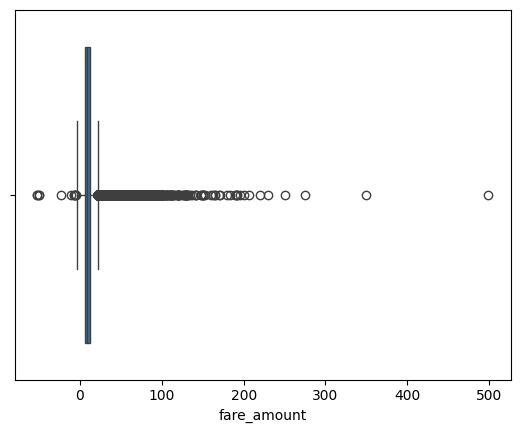

In [68]:
sns.boxplot(data=df,x=df['fare_amount'])

<Axes: ylabel='fare_amount'>

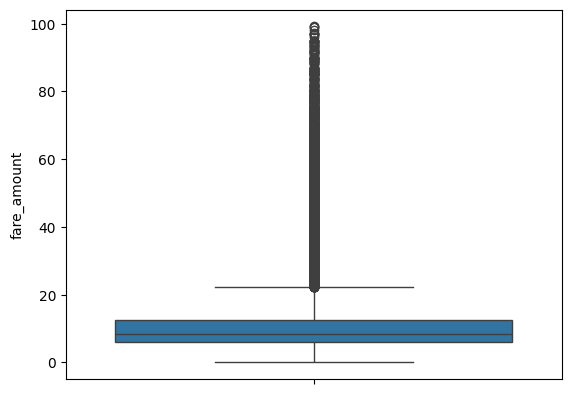

In [69]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
sns.boxplot(data=df['fare_amount'])

<Axes: >

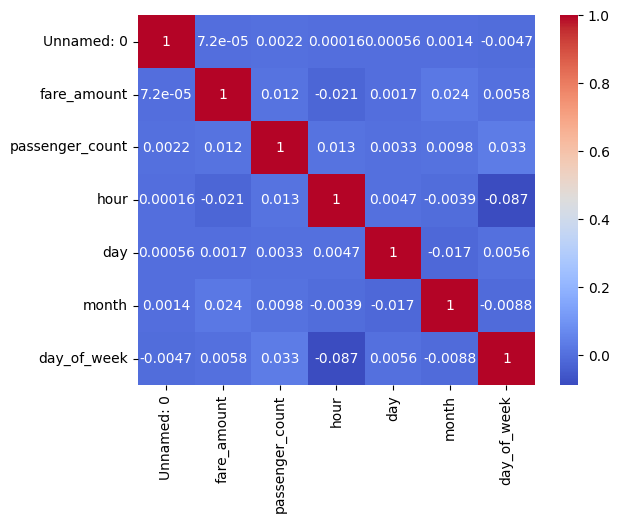

In [70]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [71]:
x = df.drop('fare_amount',axis=1)
y = df['fare_amount']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [72]:
sc = StandardScaler()                     #only for linear regression
xtrainscaled = sc.fit_transform(xtrain)
xtestscaled = sc.transform(xtest)

In [73]:
lr=LinearRegression()
lr.fit(xtrainscaled,ytrain)
lrypred=lr.predict(xtestscaled)

In [74]:
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(xtrain,ytrain)
rfypred=rf.predict(xtest)

In [75]:
def evaluate(ytrue,ypred,modelname):
    rmse=np.sqrt(mean_squared_error(ytrue,ypred))
    r2=r2_score(ytrue,ypred)
    print(f"{modelname}-RMSE: {rmse:.2f}, R2:{r2:.2f}")

In [76]:
evaluate(ytest,lrypred,"Linear Regression")
evaluate(ytest,rfypred,"Random Forest Regression")

Linear Regression-RMSE: 9.35, R2:0.00
Random Forest Regression-RMSE: 9.71, R2:-0.08
